In [2]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage
import spikeinterface
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, normalized_mutual_info_score, rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

C:\Users\s\anaconda3\envs\phy2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


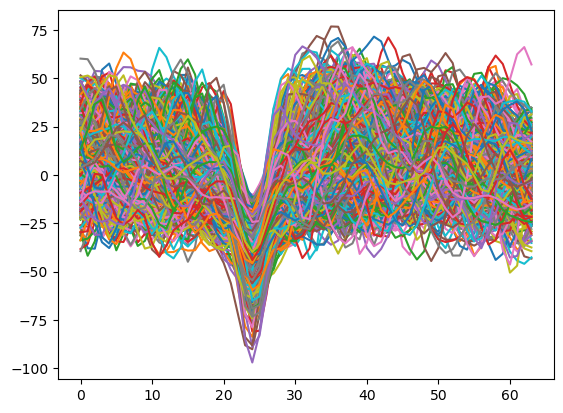

In [3]:
fp = './indy_20161005_06.mat'

mat = hdf5storage.loadmat(fp)

wf = mat['wf']
wf_raw = wf[7][0]
wf_unit_true = wf[7][2]
plt.plot(wf_raw.T)
plt.show()

[ 46.678593  -66.6874     -1.4979237 ...  64.3123      6.311386
 -49.588802 ]


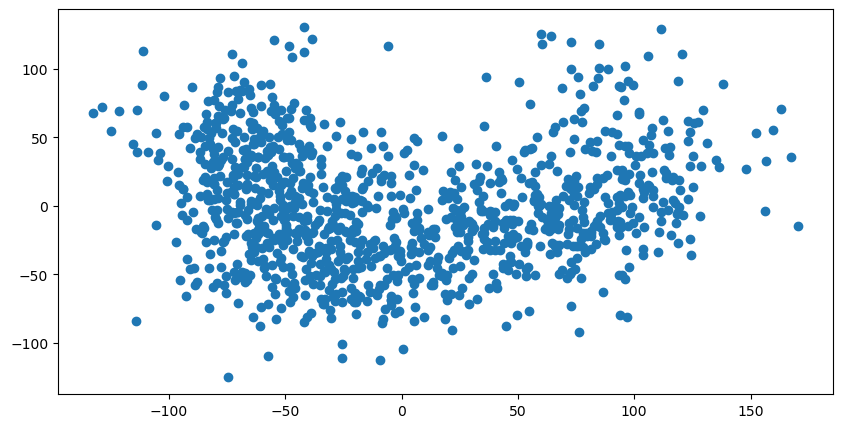

In [141]:
pca = PCA(n_components = 2)
feature_space = pca.fit_transform(wf_raw)
x = feature_space[:,0]
y = feature_space[:,1]
print(x)
plt.figure(figsize=(10,5))
plt.plot(x,y,'o')
plt.show()

C:\Users\s\anaconda3\envs\phy2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\s\anaconda3\envs\phy2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[0 1 1 ... 0 1 1]


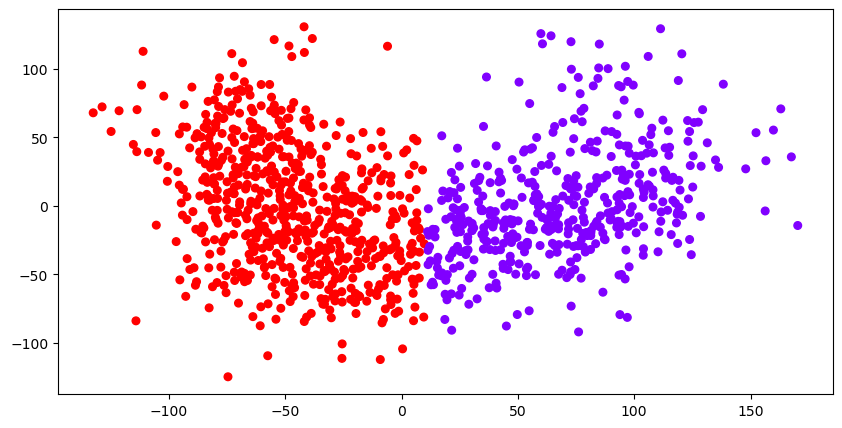

In [142]:
X = np.array(list(zip(x,y)))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

x = X[:, 0]
y = X[:, 1]
print(y_kmeans)
plt.figure(figsize=(10,5))
plt.scatter(x,y , c=y_kmeans, s=30, cmap='rainbow')

Text(0, 0.5, 'Amplitude (μV)')

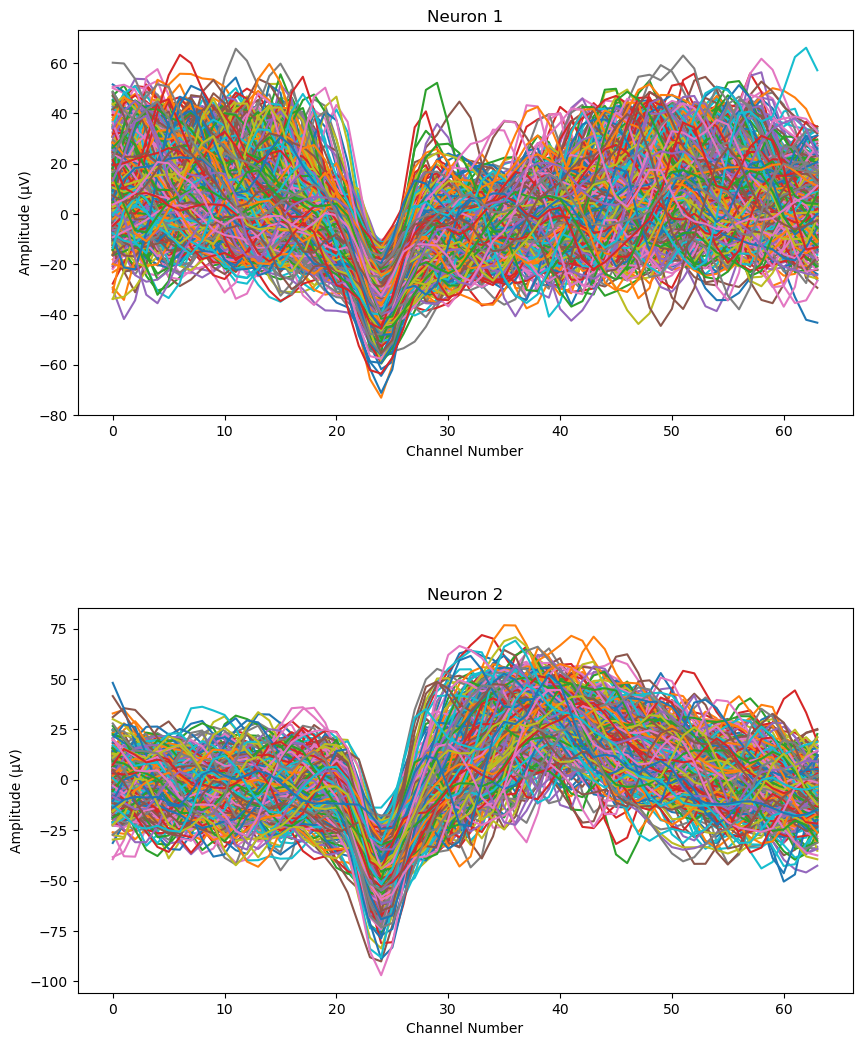

In [143]:
# Plot full spike shapes (i.e., the original 70 dimensional shape) of all the points that belong to any one of the clusters (Let’s call this cluster1).¶
plt.figure(figsize=(10,20))
# Plot full spike shapes Neuron 1
mask1 = y_kmeans == 1
mask2 = y_kmeans == 0
ax1 = plt.subplot(311)
ax1.plot(wf_raw.T[:,mask1.T])
plt.title('Neuron 1')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude (μV)')
plt.subplots_adjust(hspace=0.5)

# Plot full spike shapes Neuron 2
ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(wf_raw.T[:,mask2.T])
plt.title('Neuron 2')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude (μV)')


mean of ak of cluster 1:  -47.639126
mean of bk of cluster 1:  -0.93164325


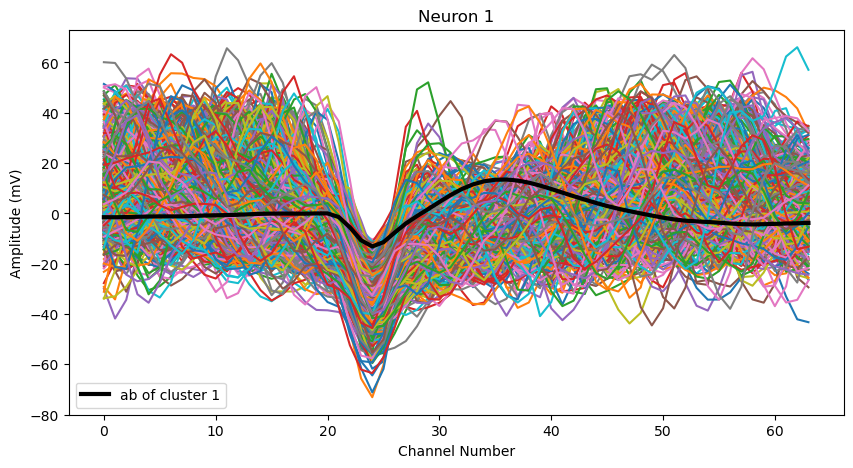

In [146]:
a = np.mean(x[mask1])
b = np.mean(y[mask1])
aq1 = a*q_1
bq2 = b*q_2
ab = aq1+bq2
print('mean of ak of cluster 1: ', a)
print('mean of bk of cluster 1: ', b)

# Plot the trace aq1+ bq2 on top of the previous plot of spike shape examples of cluster1
#plot trace of aq1 + bq2 on Neuron 1 spike shape
plt.figure(figsize=(10,5))

plt.plot(wf_raw.T[:,mask1.T])
plt.plot(ab,color='black', linewidth=3,label="ab of cluster 1")
plt.title('Neuron 1')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

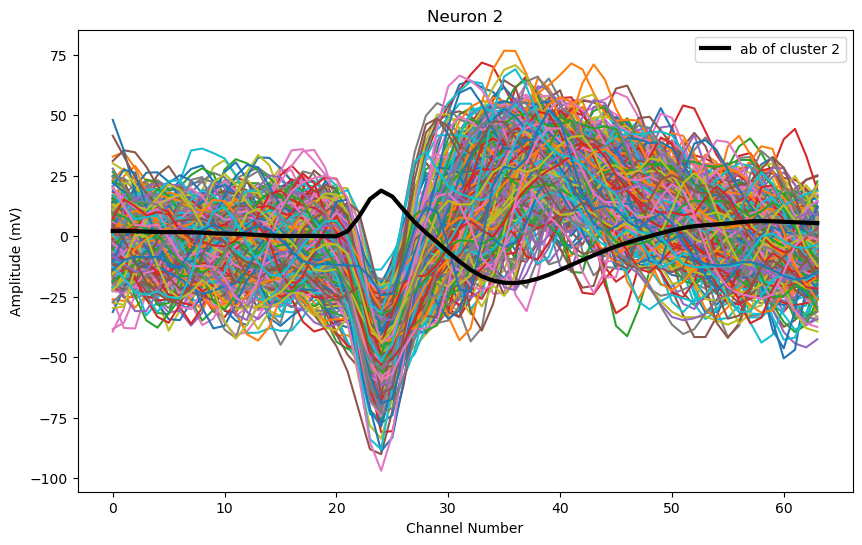

In [147]:
a2 = np.mean(x[mask2]) #cluster 2
b2 = np.mean(y[mask2]) #cluster 2

#calculate aq and bq for each cluster
aq12 = a2 * q_1 #cluster 2
bq22 = b2 * q_2 #cluster 2

#calculate ab
ab2 = aq12 + bq22 #cluster 2

#plot trace of aq1 + bq2 on Neuron 2 and Neuron 3 spike shape
plt.figure(figsize=(10,15))

# Neuron 2
ax1 = plt.subplot(211)
ax1.plot(wf_raw.T[:,mask2.T])
plt.plot(ab2, color='black', linewidth=3, label="ab of cluster 2")
plt.title('Neuron 2')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

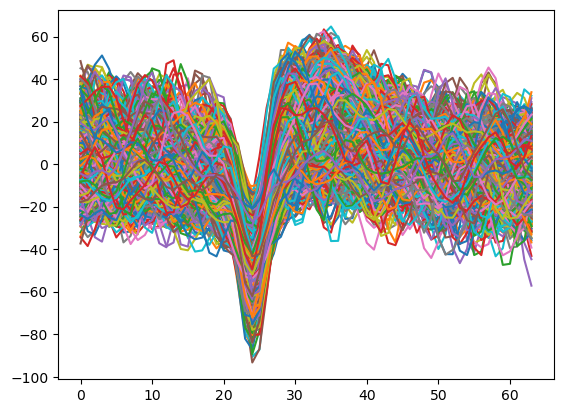

In [152]:
wf_unit_true = wf[7][2]
plt.plot(wf_unit_true.T)
plt.show()


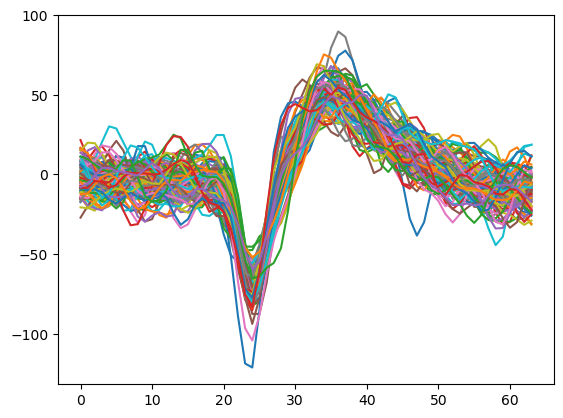

In [154]:
wf_unit_true = wf[7][1]
plt.plot(wf_unit_true.T)
plt.show()